# Lesson 2. Graphical presentation of data

Presenting data as long tables full of numbers is usually not the best way to present it, especially if it involves conveying some idea or general information. The possibility of synthetic visualization of this data is extremely important. Fortunately, python has extensive tools that allow for the graphical presentation of data quickly and conveniently.

## `matplotlib` library

The basic package of python visualization tools is the `matplotlib` library. It is a very extensive package. This lesson will only cover the basic and most frequently used features of `matplotlib`.

To use the library, one must load it by importing one of its functional modules, such as `pyplot`, a kind of access interface. For interactive use, for example in a jupyter environment, it is also a good idea to execute an additional command that causes the images to be displayed directly on the screen (instead of the default behaviour - saving the image files to disk):

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

From now on, we can use all the possibilities of `matplotlib`.

## Two-dimensional graphs

Let's try to draw a simple graph. Let's build two lists, one containing the $x$ coordinates of the points, and the other containing the $y$ coordinates.
Next, let's create a graph and display it:

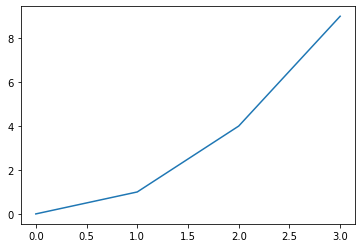

In [ ]:
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
plt.plot(x, y)
plt.show()


As you can see, the points were automatically connected by segments. Unfortunately, the graph is quite "angular"; you can add more points to smooth it out. For this purpose, we will use the command from the numpy package, which creates an array of evenly spaced points (in mathematics this is called a vector space or a linear space, hence the name of the function). Next, we will plot the function $y = x^2$.

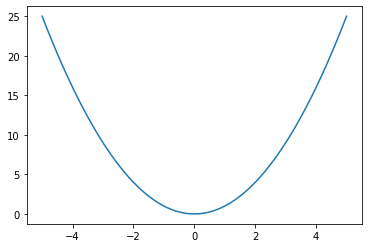

In [ ]:
import numpy as np

x = np.linspace(-5,5, 100)
plt.plot(x, x**2)
plt.show()


We can also display several graphs simultaneusly:

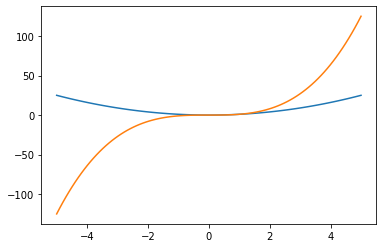

In [ ]:
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.show()

We can manually set all the graphic parameters, but it's better to use one of the built-in styles. Available styles can be displayed using the command `print(plt.style.available)`

In [ ]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


The selected style can be set with the `plt.style.use('styl') command: 
`

In [ ]:
plt.style.use('seaborn-poster')


Let's add more elements:  the *title* of the graph, the *labels* of individual curves and their *legend*, both *axis labels* and set the axis range. Let's also change the appearance of the curves by setting *colours*, adding *markers* and changing the appearance of the *lines*:

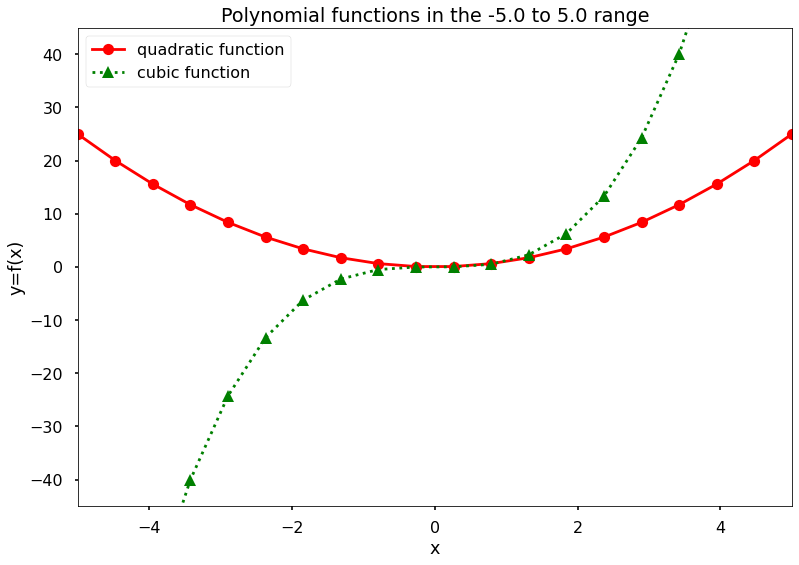

In [ ]:
x = np.linspace(-5,5, 20)

plt.title(f'Polynomial functions in the {x[0]} to {x[-1]} range')
plt.xlim(-5,5)
plt.ylim(-45,45)
plt.plot(x, x**2, marker='o', linestyle='-', color='red', label='quadratic function')
plt.plot(x, x**3, marker='^', linestyle=':', color='green', label='cubic function')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y=f(x)')

plt.show()

## Animations

One of the convenient features of the `matplotlib` package is creating interactive animations. Let's look at it in the example below.

First, we need to load the appropriate libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline

Next, let's set the image parameters:

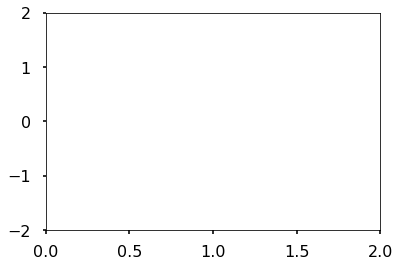

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

We have defined the axis ranges and a `line` object that is used to draw the graph. Note that it is empty for now. We will fill it with data later.

Let's define a function that draws a background for each frame of the animation:

In [ ]:
def init():
    line.set_data([], [])
    return line,


The function `init()` forms the basis for drawing each frame of our animation. Here again, we have blank data, however, the function must return a `line` object. This tells the animator which element to refresh when creating the animation.

Let's define the function responsible for creating the animation itself:

In [ ]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


The animation function takes a single argument `i` and produces our curve (sine wave) shifted by a value depending on`i`. Note that the function also returns a `line` object, which will be redrawn in each animation frame.

Let's call this function:

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


The object must be persistent, so we assign it to the variable `anim`. We chose 100 frames of animation with an interval of `20 ms` between consecutive frames. The `blit=True` parameter tells the animation to only redraw the pieces of the plot which have changed. This saves time creating the animation and makes the result smoother (no unpleasant flickering is visible).

The last step is actually to render and display the resulting animation. In the jupyter notebook we will use the HTML5 functionality for this. We can also generate a movie and save it to a video file (e.g. mp4).

> **Attention!** This command may take a while to execute, please wait patiently!

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Summary

As mentioned, the `matplotlib` library is a very extensive and powerful package. A quick overview is available in the [gallery](https://matplotlib.org/stable/gallery/index.html). You can also use various [tutorials](https://matplotlib.org/stable/tutorials/index.html) and finally the [full documentation](https://matplotlib.org/stable/contents.html). We strongly encourage you to experiment on your own.